In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [83]:
data = pd.read_csv('Clean_Dataset.csv')
eco = pd.read_csv('economy.csv')
biz = pd.read_csv('business.csv')

In [84]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [85]:
data.drop("Unnamed: 0", axis=1, inplace=True)


FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [87]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [88]:
cat = ['airline','source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class']
cont  = ['duration', 'days_left']

Text(0.5, 1.0, '')

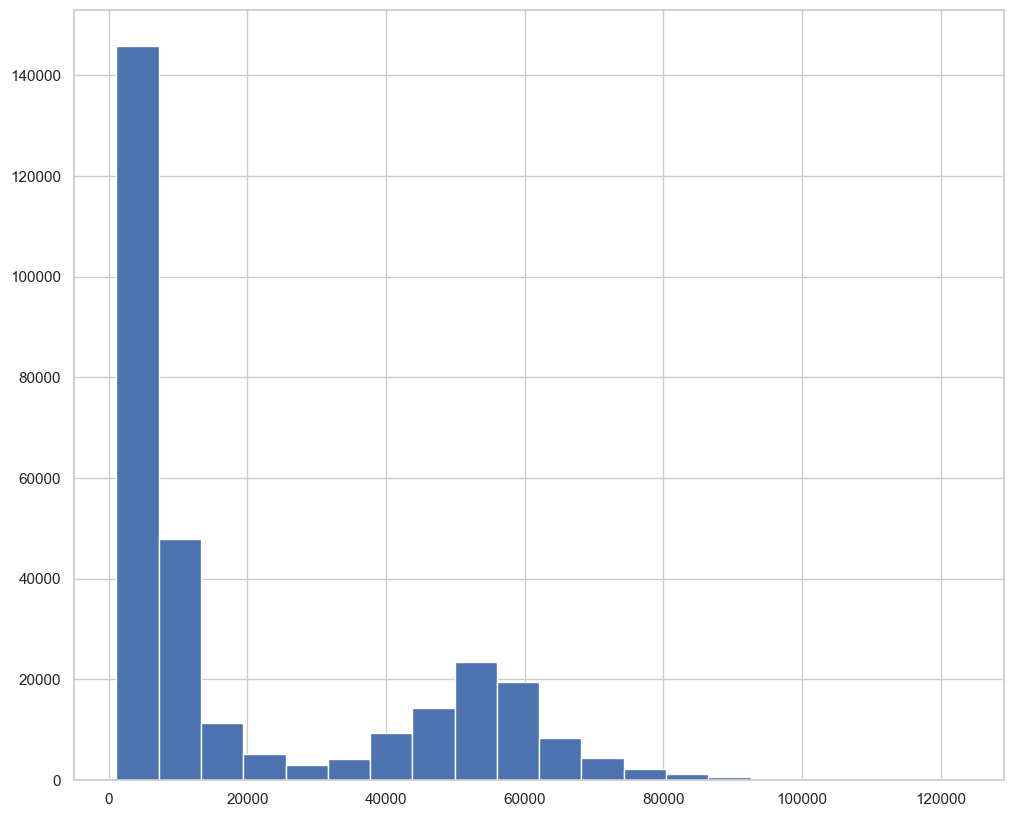

In [89]:
plt.figure(figsize=(12,10))
data['price'].hist(bins=20)
plt.title('')

In [90]:
data['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [91]:
for i in cat:
    a = data[i].value_counts()
    print(a)
    print("*******************")
    

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
*******************
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
*******************
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
*******************
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64
*******************
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
*******************
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
*******************

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


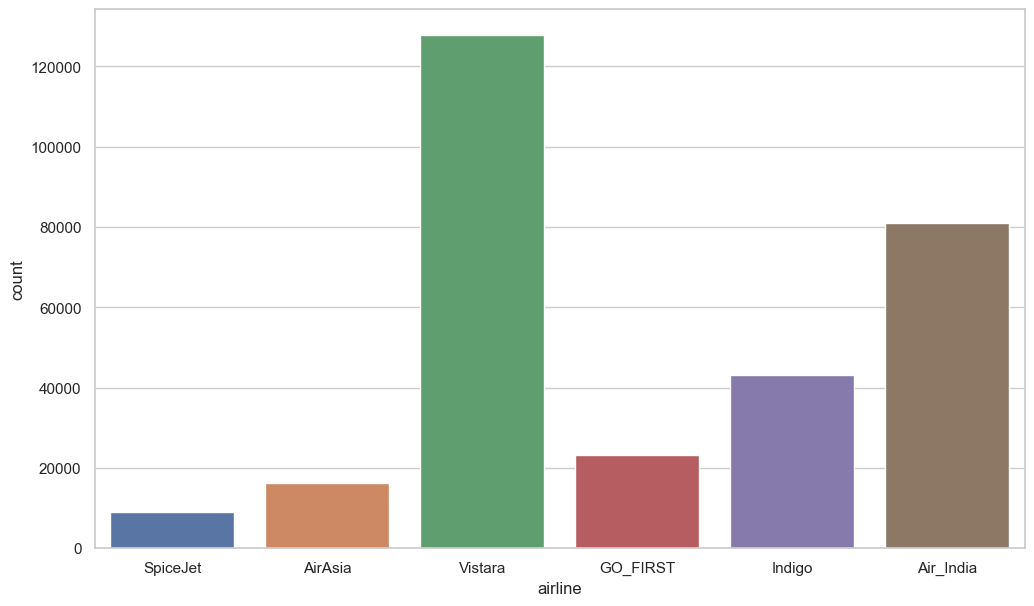

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


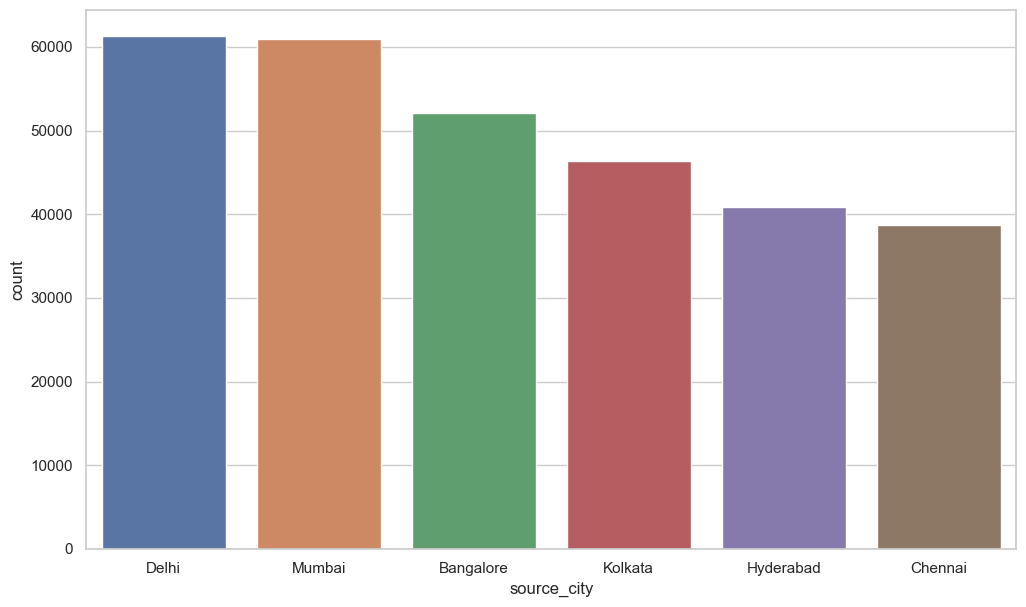

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


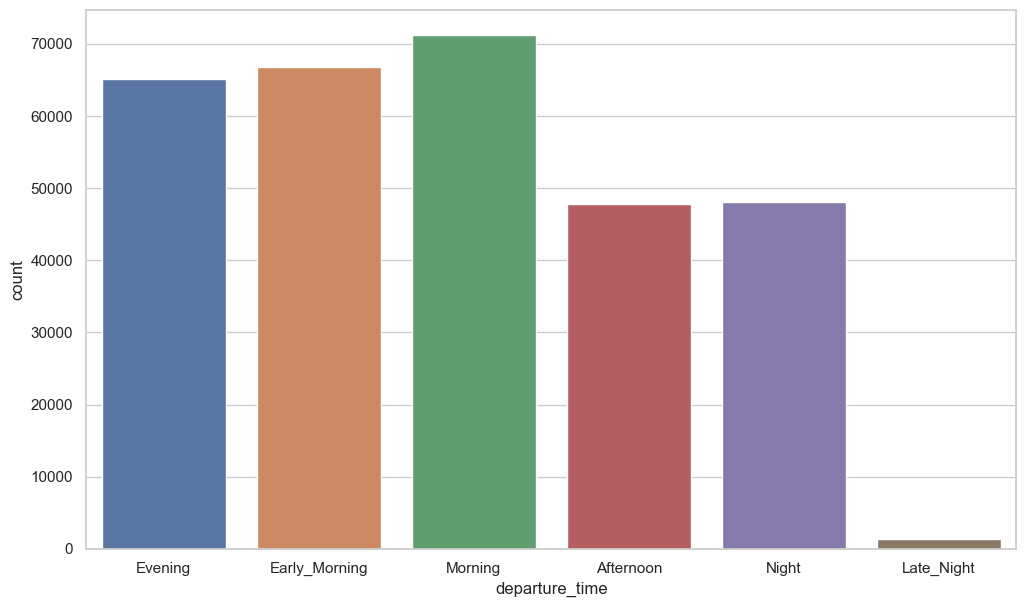

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


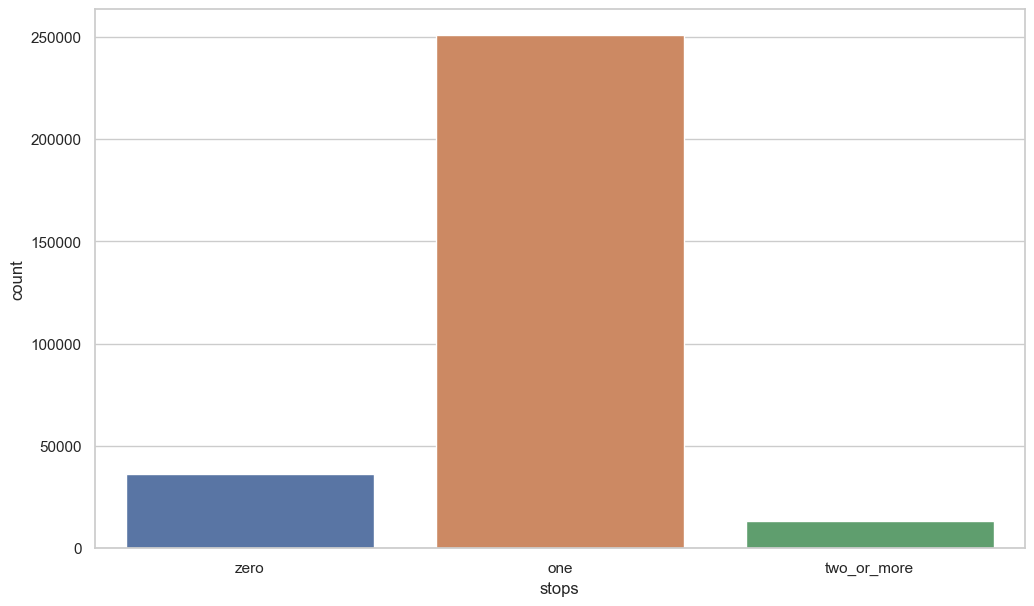

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


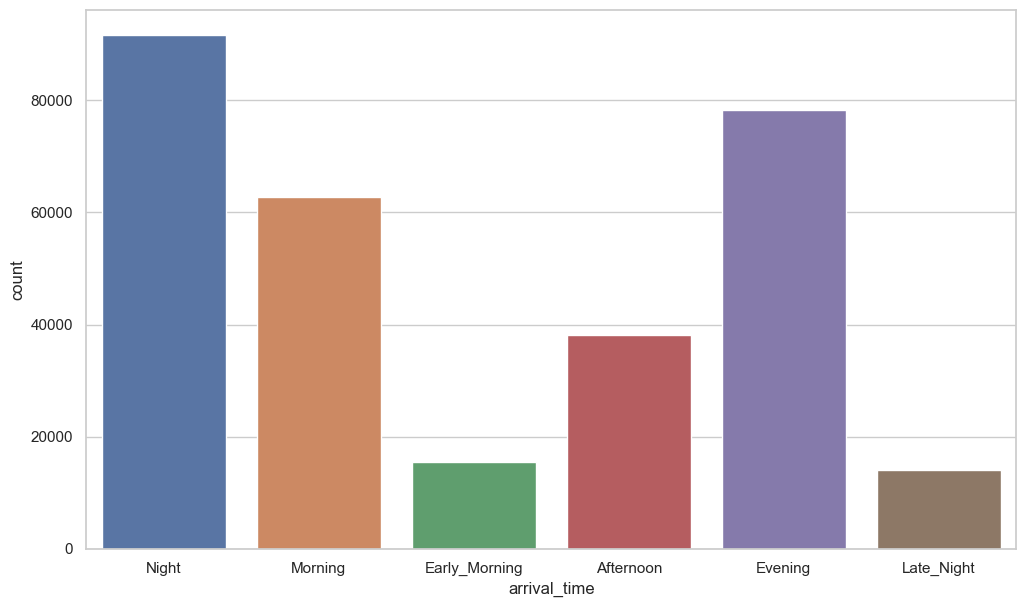

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


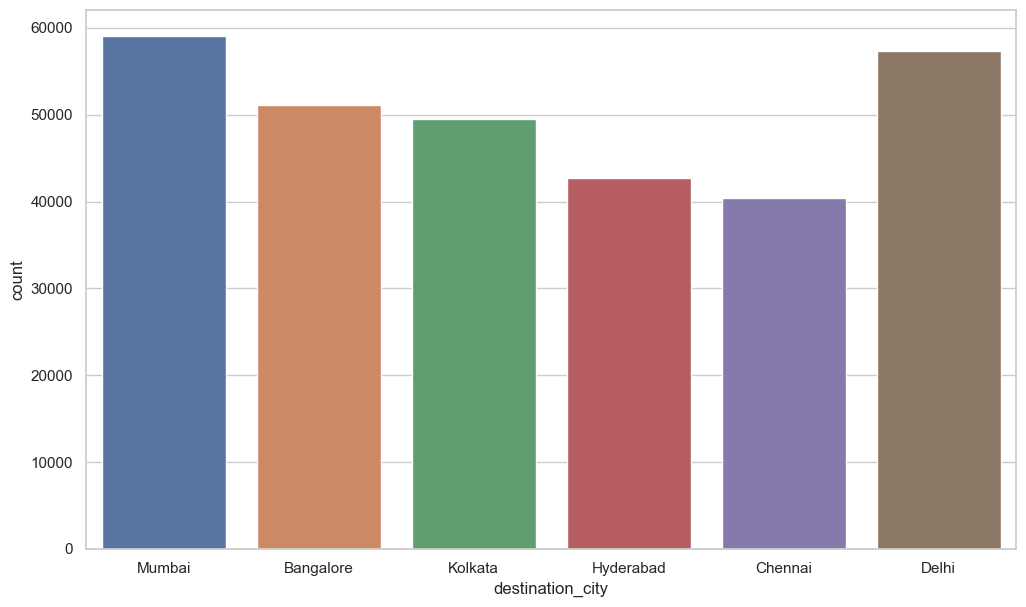

C:\Users\khann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


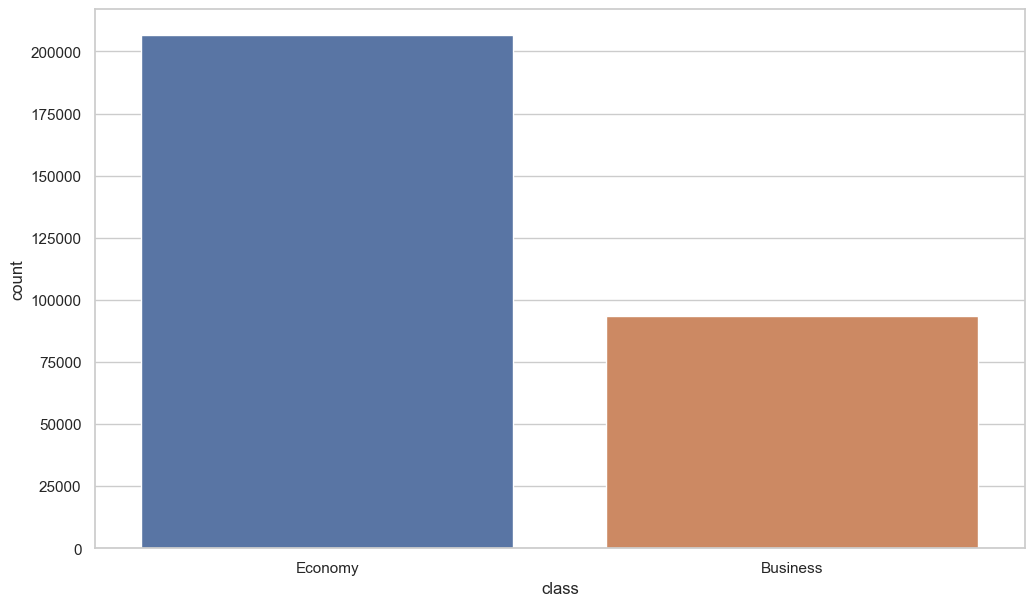

In [92]:
for i in cat:
    plt.figure(figsize=(12,7))
    sns.countplot(data[i])
    plt.show()

### Research Questions
The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

## A) Does price vary with Airlines?

In [93]:
(data.groupby('airline')['price'].sum()).sort_values()

airline
SpiceJet       55681482
AirAsia        65858089
GO_FIRST      130973972
Indigo        229580207
Air_India    1901529790
Vistara      3886470735
Name: price, dtype: int64

#### We can see Vistara is costlier then any other airline in total price, but we should also find out whether other variables play i role in total price while keeping it in context to airline.

#### Lets create a function in which we will just put the variable in and we will be able to see a plot which should help us to come to a conclusion on price variations

In [94]:
def price_vs(x):
    col = set(data[x].tolist())
    
    for i in col:
        group_data = data[data[x] == i].groupby('airline')['price'].sum().reset_index()
        sns.set(style="whitegrid")
        plt.figure(figsize=(10,5))
        sns.barplot(x='airline', y='price', data=group_data.sort_values('price'))
        plt.title(f'{x} = {i}')
        plt.ticklabel_format(style='plain', axis='y')  # Set y-axis labels without scientific notation
        plt.show()


### A.1) - Price vs Destination City

#### VISTARA and Air India are the most expensive flights in these cities as destination

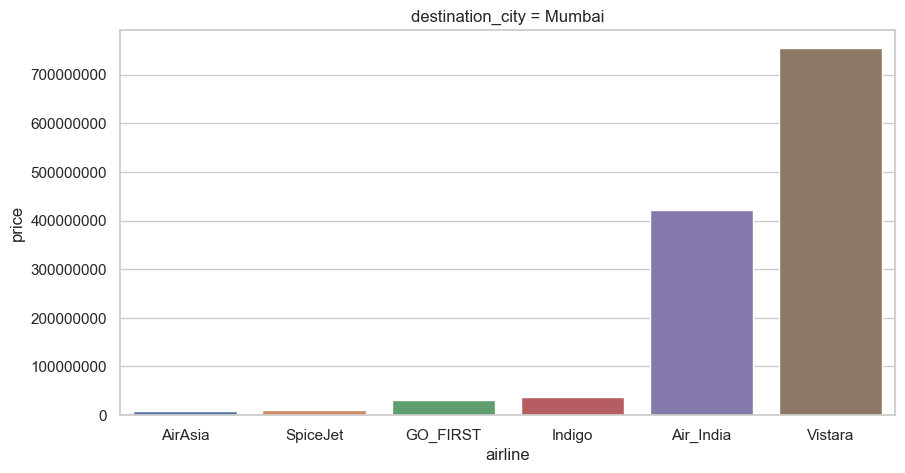

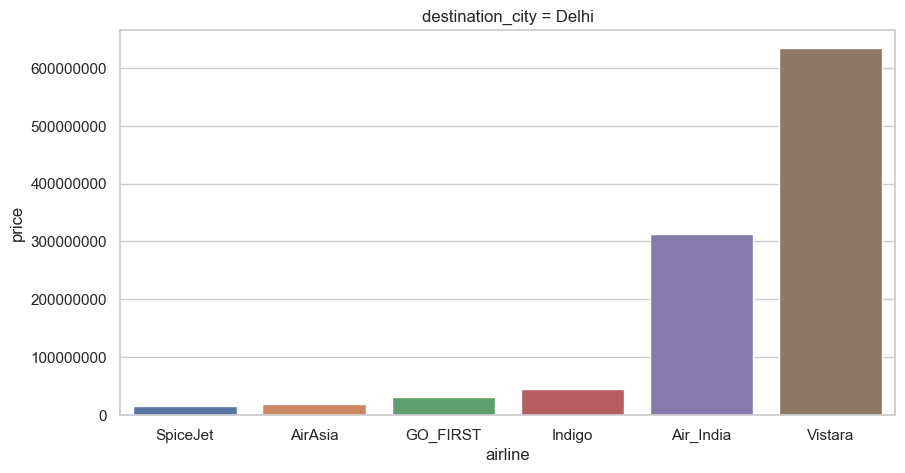

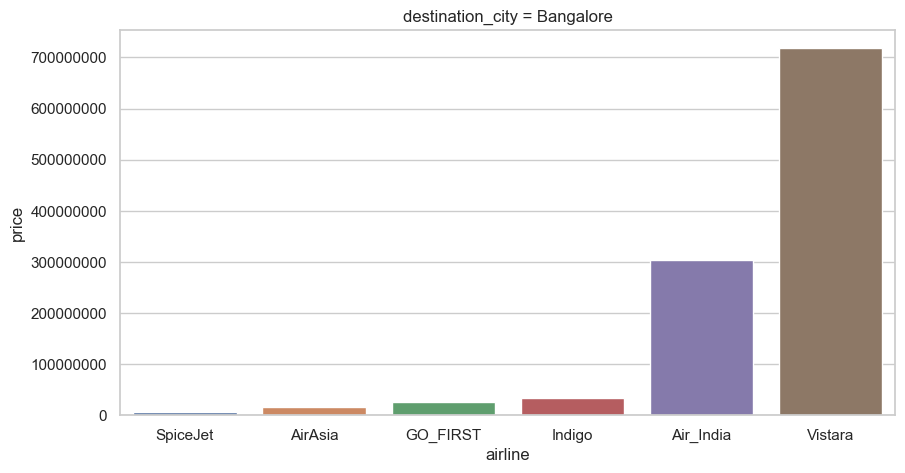

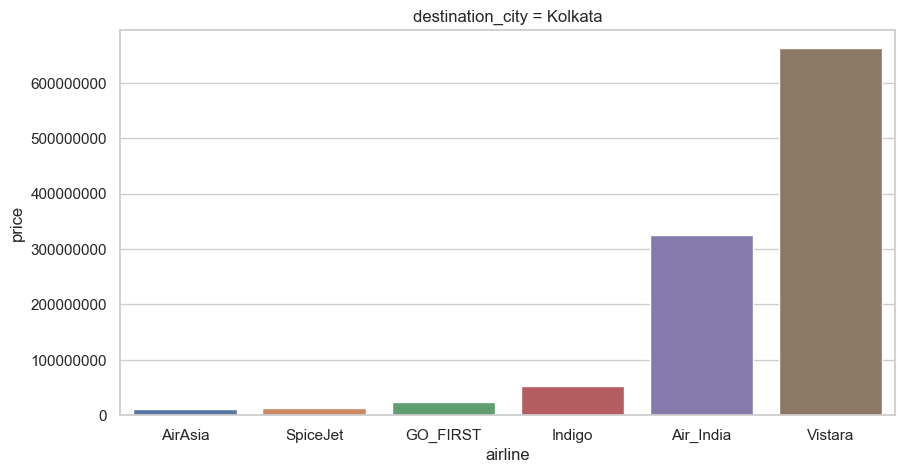

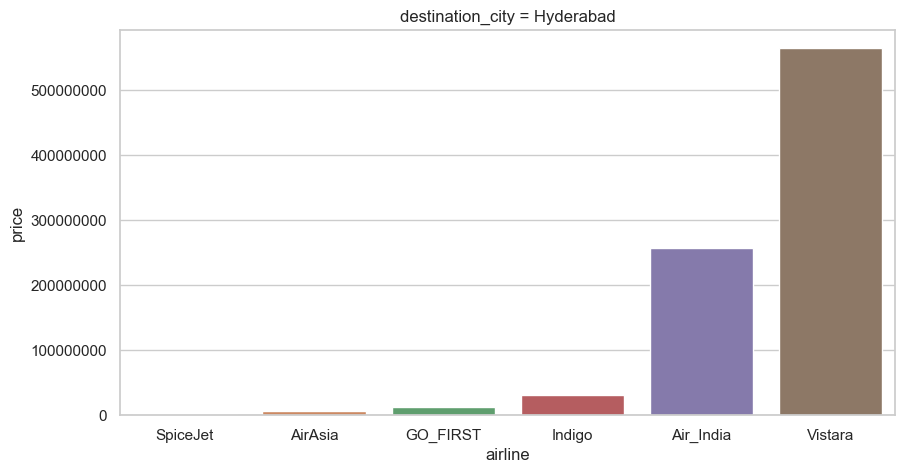

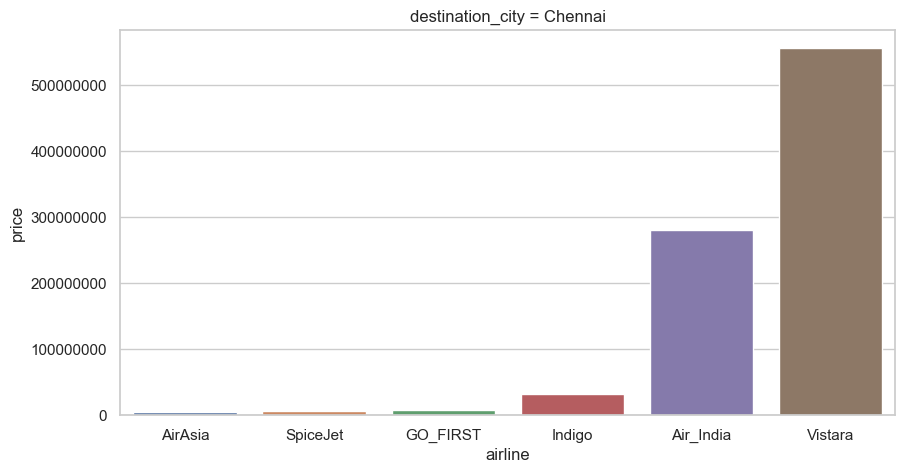

In [95]:
price_vs('destination_city')

### A.2) - Price vs Source City
#### VISTARA and Air India are still most expensive flights in these cities are where the flight originated from.

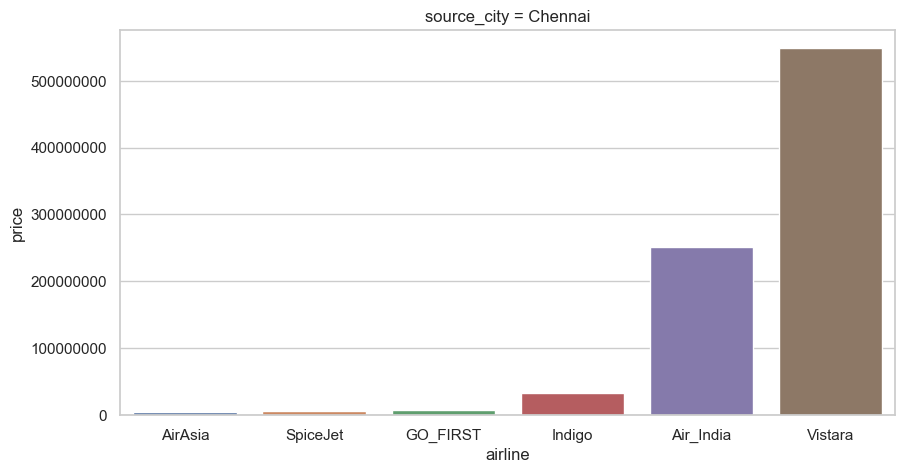

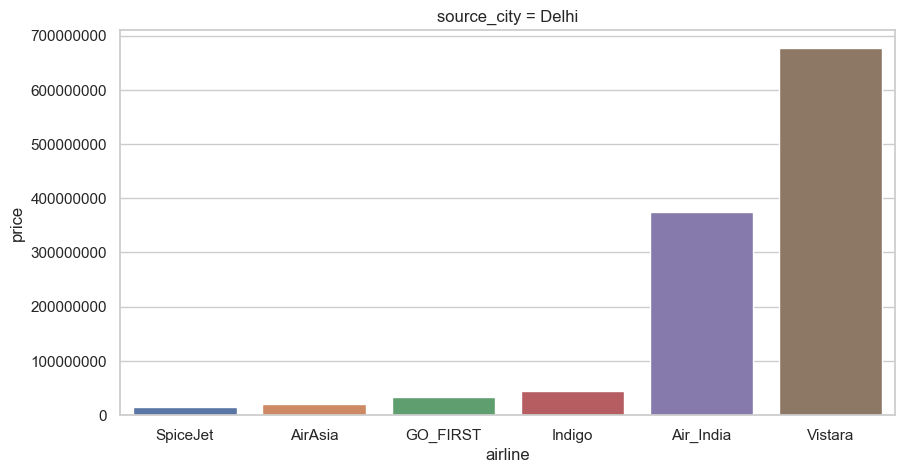

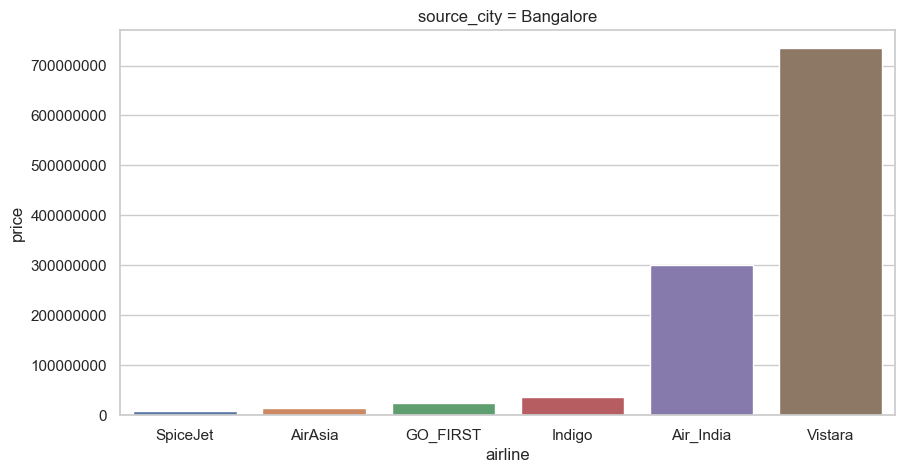

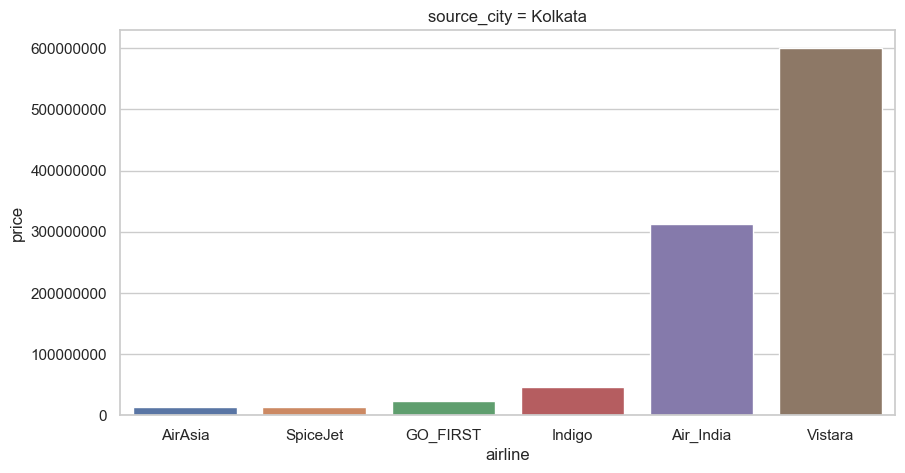

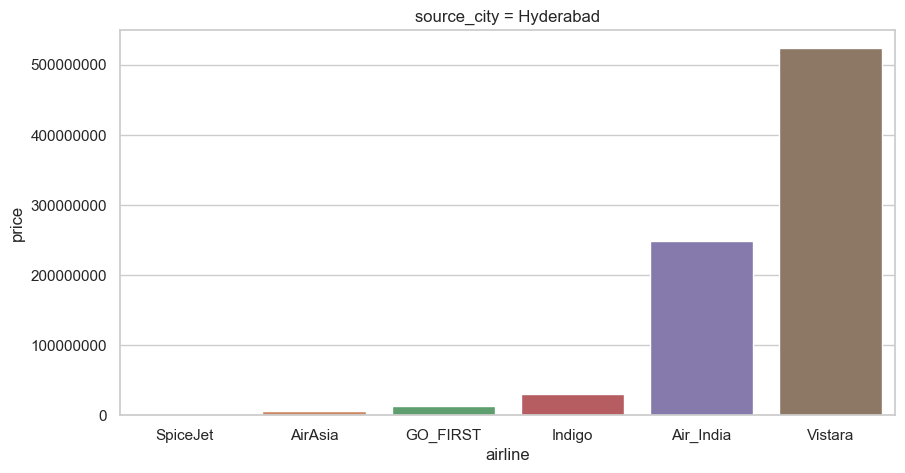

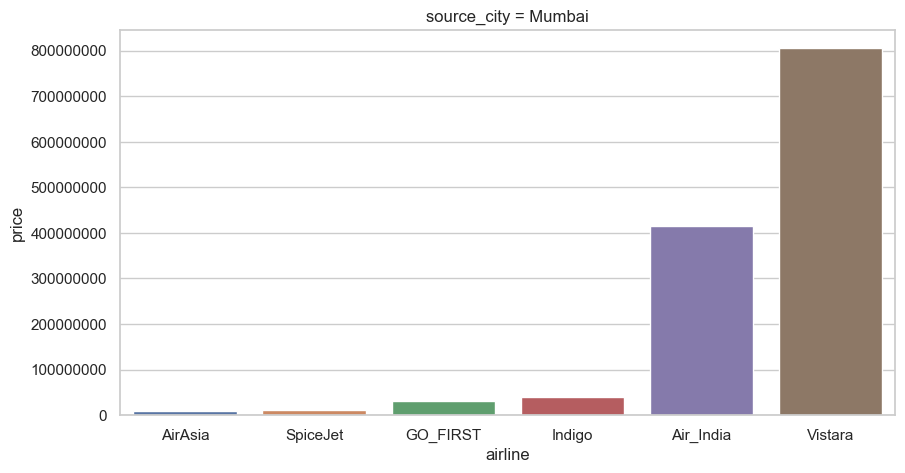

In [96]:
price_vs('source_city')

### A.3) - Price vs Departure Time 

1.Vistara and Air India are the most expensive flights regardless of the departure time. This suggests that these airlines may offer premium services or have higher pricing strategies compared to other airlines.

2.Late night flights, which are not offered by Vistara according to the plots, may have lower demand or fewer available flights. This could explain why Vistara is not present in the late night departure time category. It's possible that Vistara focuses more on other time slots or has different operational considerations.

3.Morning flights tend to sell the most out of all the other timings. This indicates that there is higher demand for morning flights, possibly due to factors such as business travel, convenient departure times for connecting flights, or personal preferences of travelers.

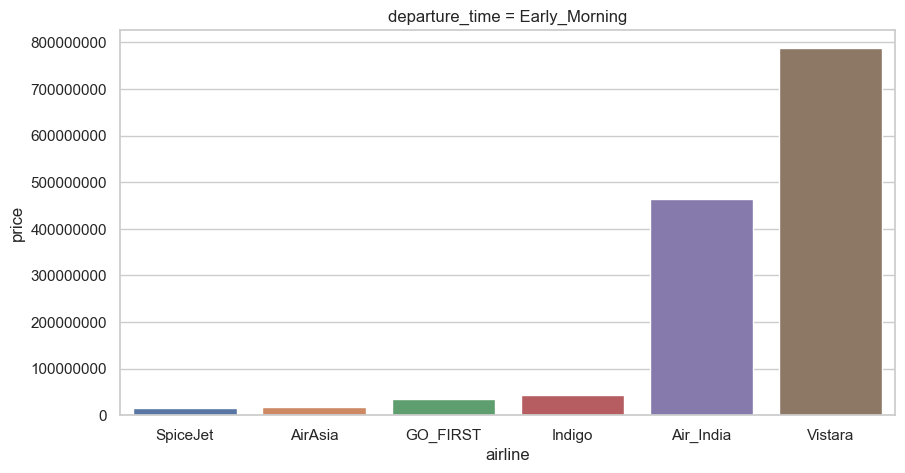

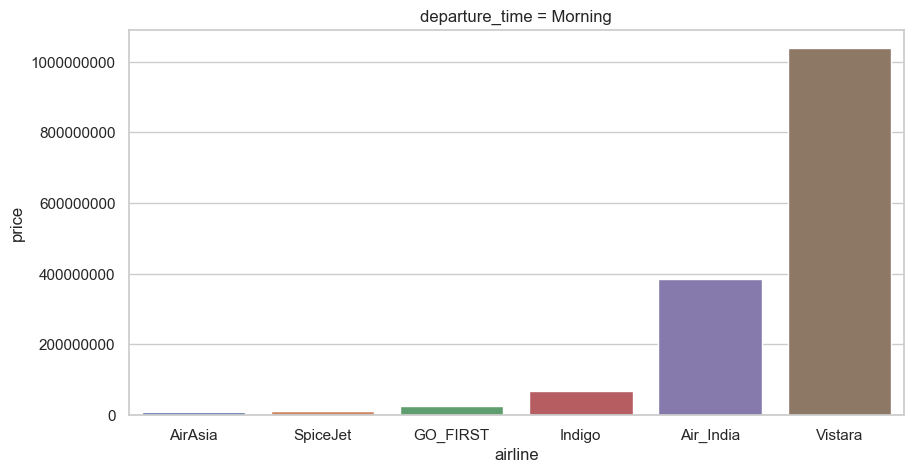

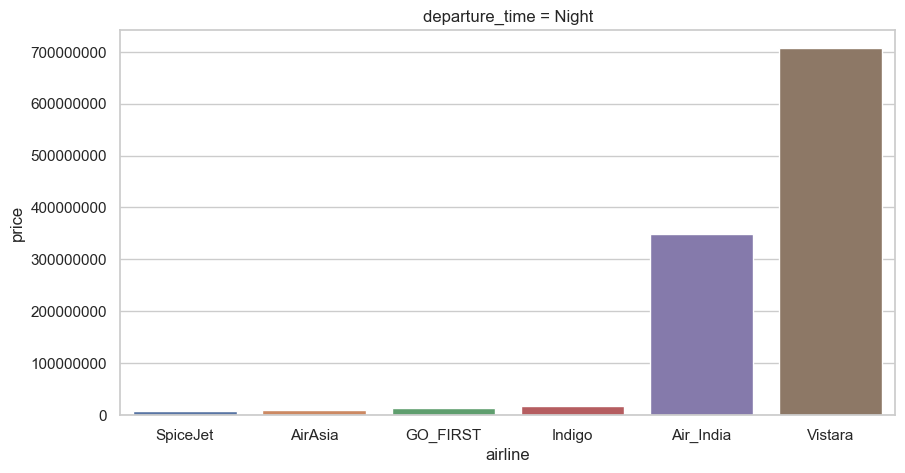

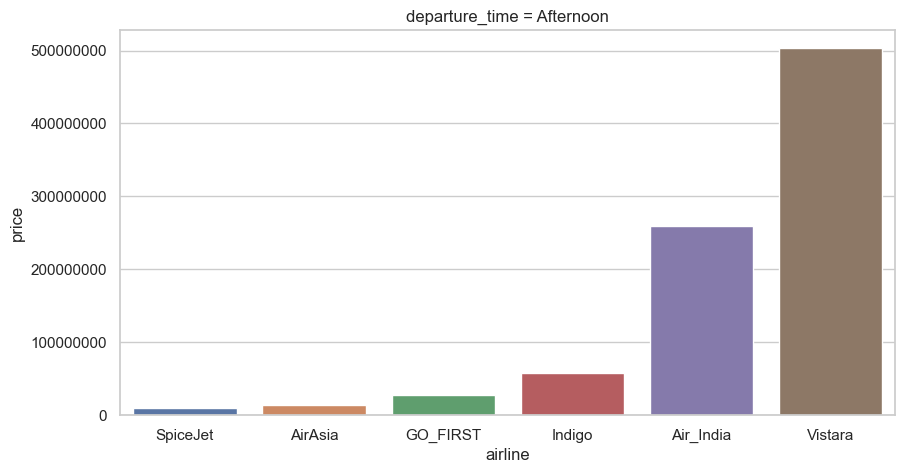

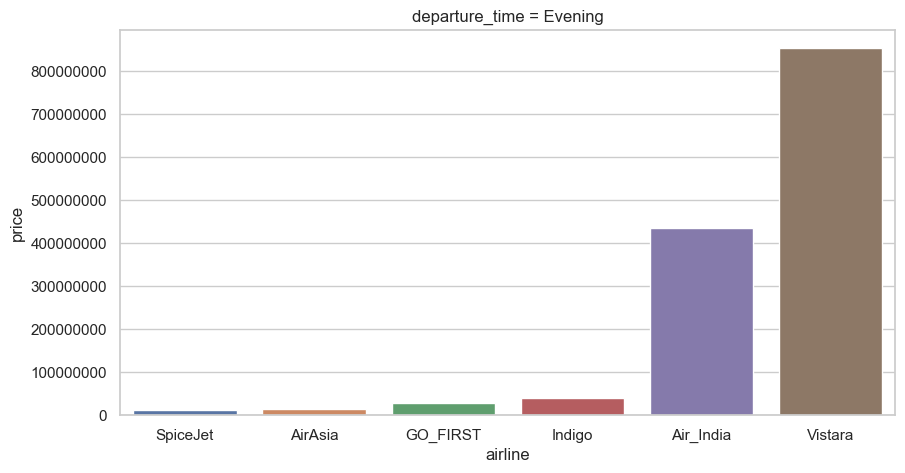

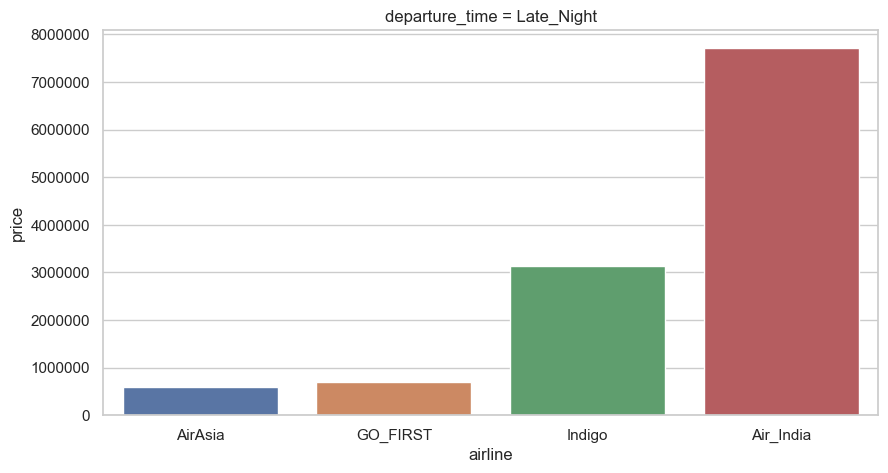

In [97]:
price_vs('departure_time')

### A.3) - Price vs Number of stops
1. While the price pattern remains the same, we can see that most of SpiceJet planes usually deals with 0 or a single stops but there are no flights for multiple stops. 
2. For other airlines, flights with two or more stops are generally the least expensive. This could be because flights with multiple stops often involve longer travel times and may be less preferred by passengers who prioritize shorter travel durations.

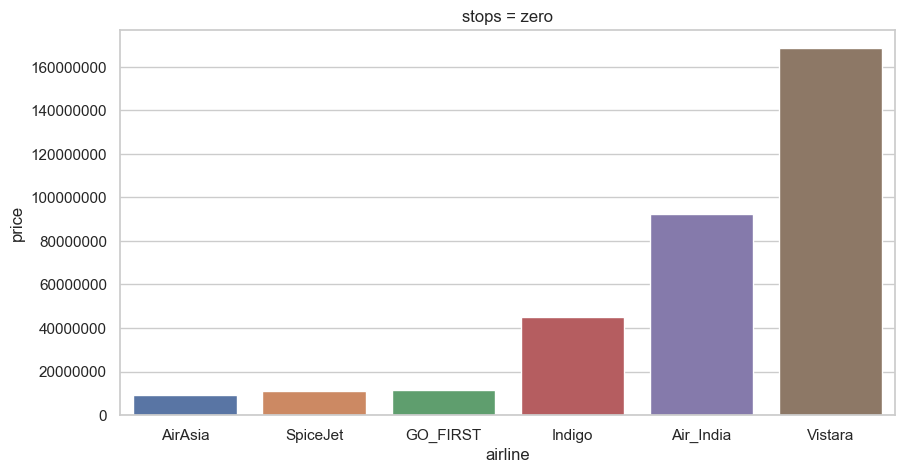

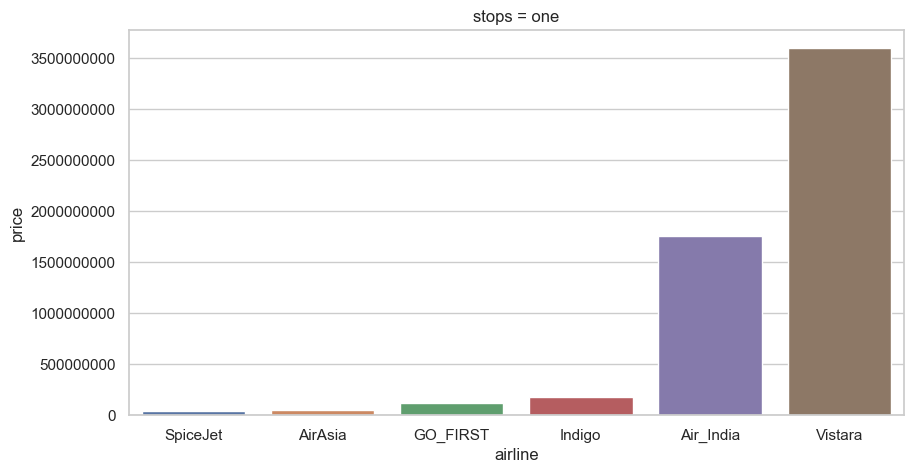

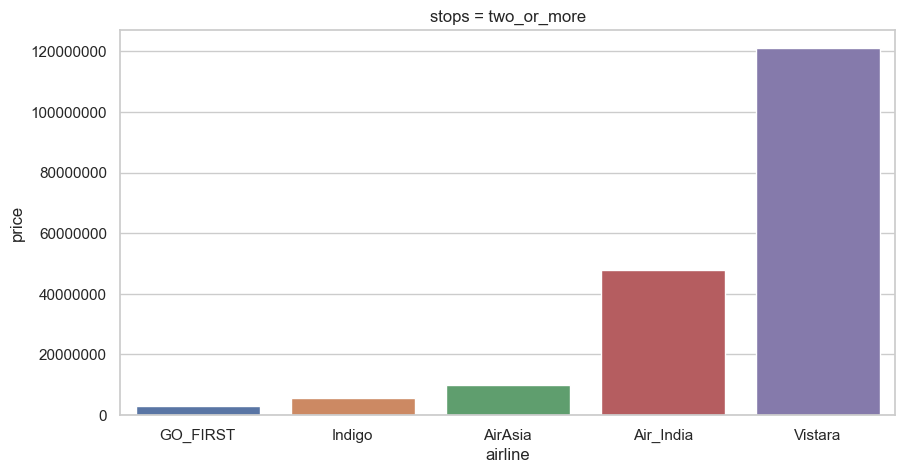

In [98]:
price_vs('stops')

### A.4) - Price vs Class
1.Air India and Vistara are the only airlines that offer Business class flights. This explains why they have the most expensive ticket prices compared to other airlines. Business class flights generally provide premium services and amenities, which justify the higher price point.

2.The other airlines focus more on providing flight options for the general public, as they do not offer Business class. This suggests that these airlines cater to a broader customer base and aim to provide affordable travel options.

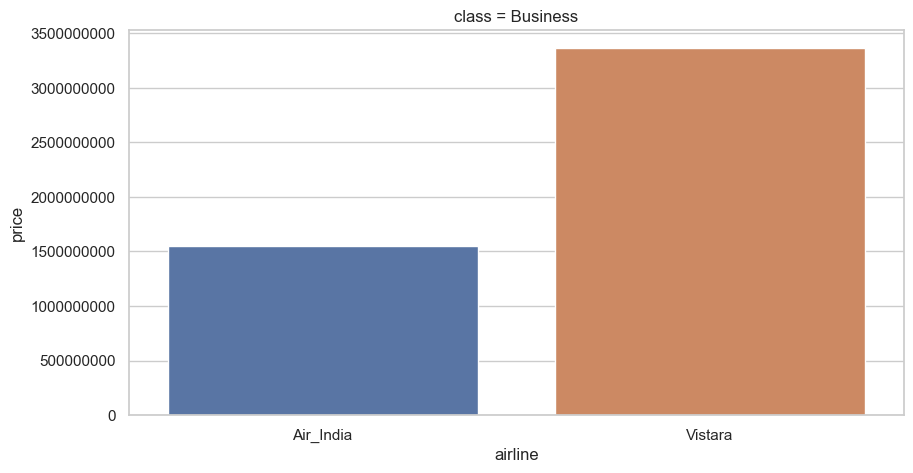

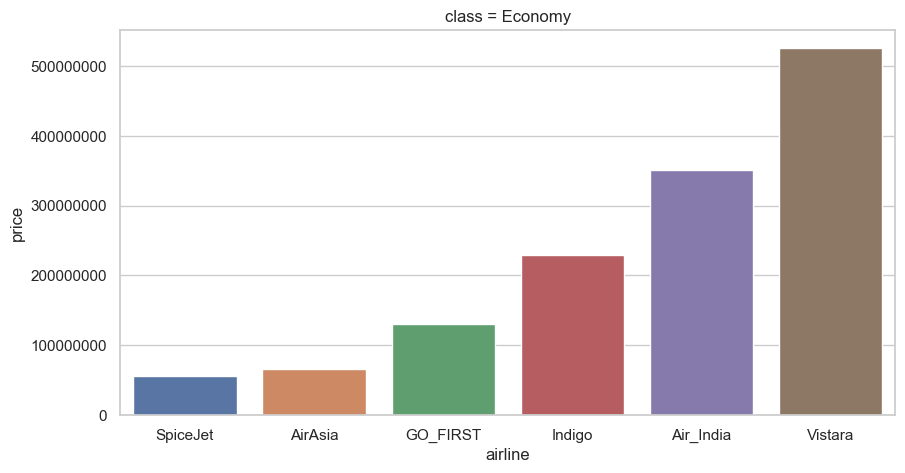

In [99]:
price_vs('class')

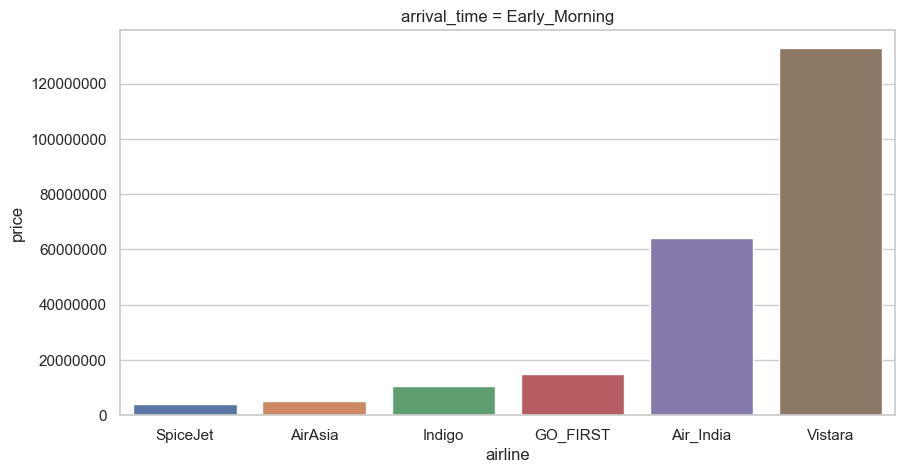

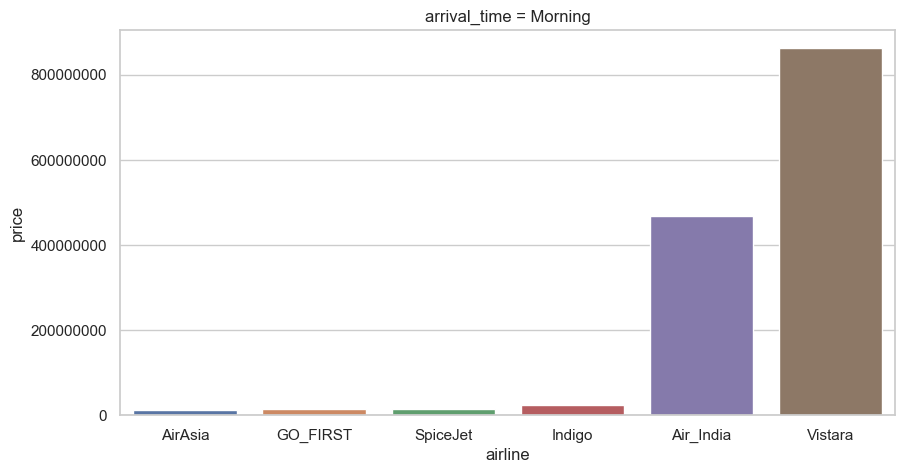

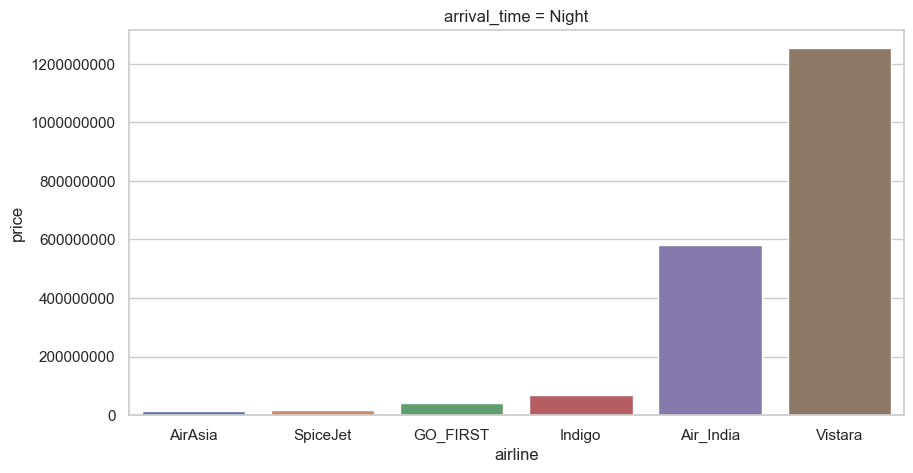

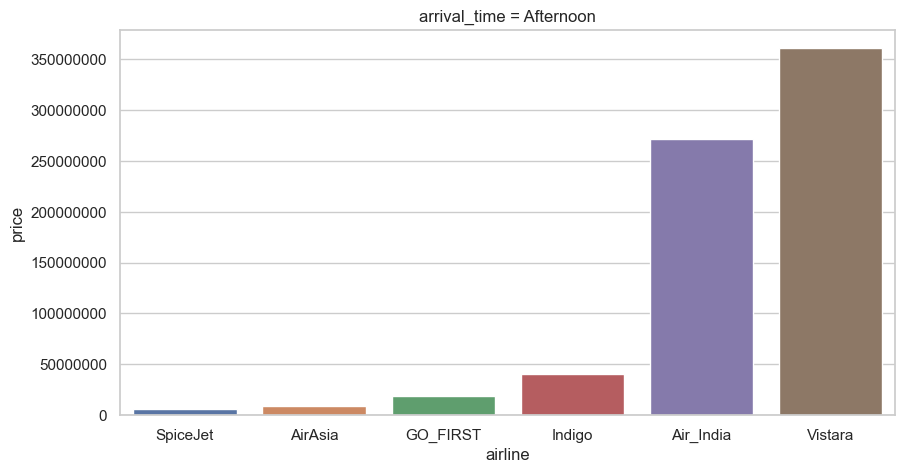

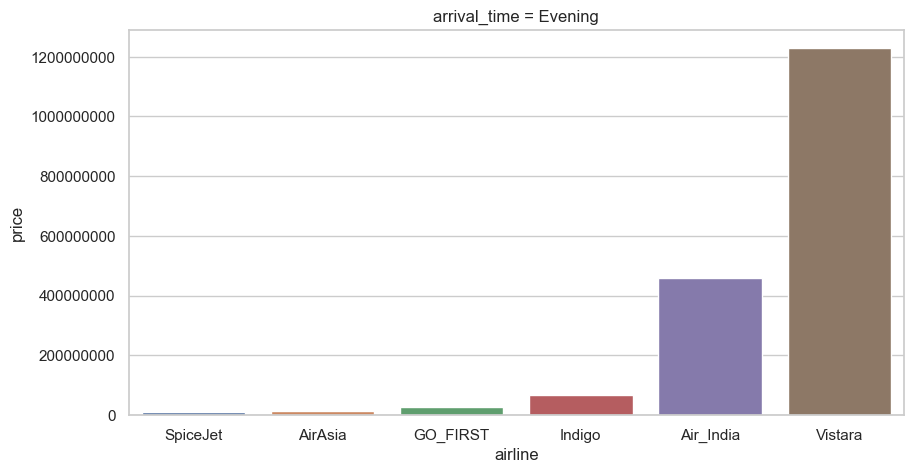

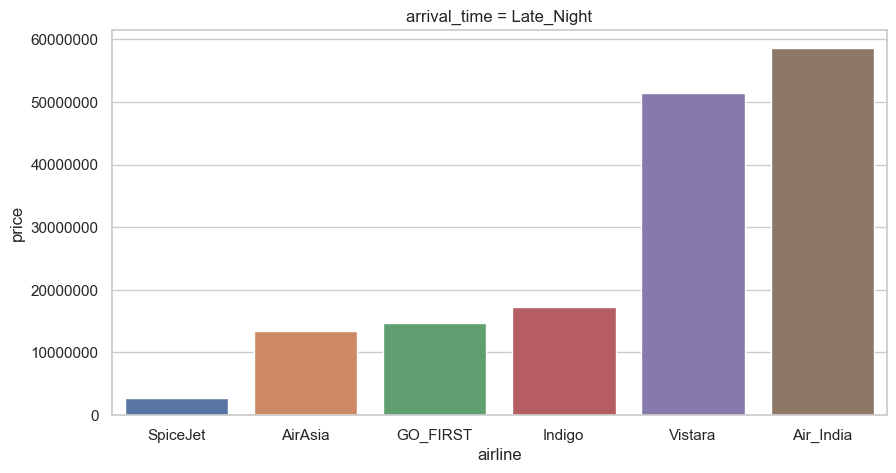

In [100]:
price_vs('arrival_time')

### RESEARCH QUESTION - 2
### b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

As the number of days left before departure decreases (from 1 to 10 days), the total ticket prices increase. This suggests that booking tickets closer to the departure date tends to result in higher prices.

After the 10-day mark, the total ticket prices fluctuate but generally remain relatively stable.

The highest total ticket prices are observed when tickets are booked 2 days before departure. This indicates that last-minute bookings, particularly within 1-2 days, can result in higher prices.

As the number of days left before departure increases beyond 10 days, the total ticket prices gradually decrease and then stabilize. This suggests that booking tickets well in advance can lead to more affordable prices.

In [101]:
a = data.groupby('days_left')['price'].sum().reset_index()
b = data.groupby('days_left')['price'].mean().reset_index()
c = data['days_left'].value_counts().reset_index().sort_values('index').reset_index()
a['price_mean'] = b['price']
a['value_counts_days_left'] = c['days_left']

a = a.rename(columns={'price':'price_sum'})
a = a[['days_left','value_counts_days_left','price_sum','price_mean']]
a

,days_left,value_counts_days_left,price_sum,price_mean
0,1,1927,41607528,21591.867151
1,2,4026,121630693,30211.299801
2,3,4248,123090403,28976.083569
3,4,5077,130635808,25730.905653
4,5,5392,143857338,26679.773368
5,6,5740,142676275,24856.493902
6,7,5703,145930459,25588.367351
7,8,5767,143574563,24895.883995
8,9,5665,145739184,25726.246072
9,10,5822,148884953,25572.819134


### c) Does ticket price change based on the departure time and arrival time?

In [102]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


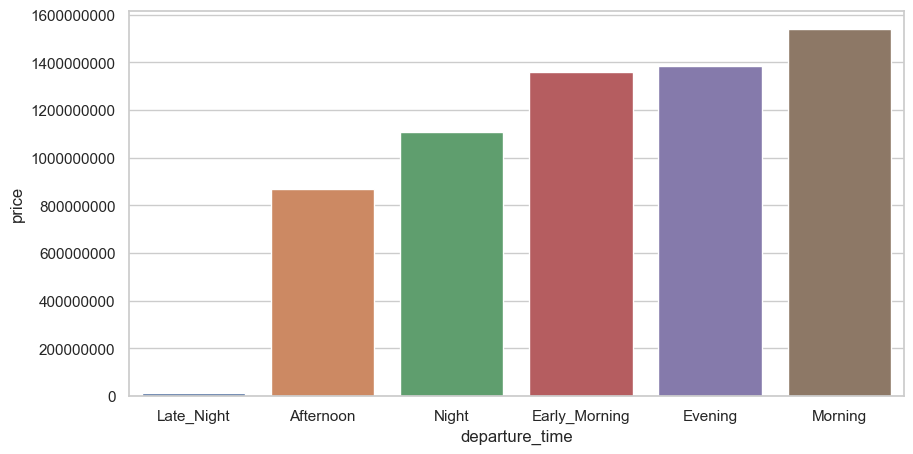

In [103]:
e = data.groupby('departure_time')['price'].sum().reset_index().sort_values('price')

plt.figure(figsize=(10,5))
sns.barplot(data = e, x='departure_time',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

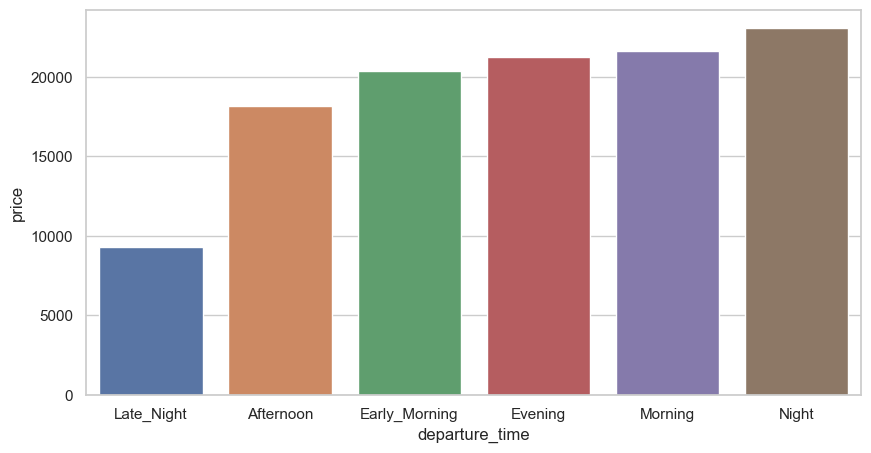

In [104]:
e = data.groupby('departure_time')['price'].mean().reset_index().sort_values('price')

plt.figure(figsize=(10,5))
sns.barplot(data = e, x='departure_time',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Departure Time:

The sum of prices for flights with morning departure time is the highest, indicating that there is a high demand for morning flights.

On average, flights with departure time at night tend to have higher prices compared to other times of the day. This suggests that there may be factors such as convenience, demand, or limited availability that contribute to the higher prices for night departures.


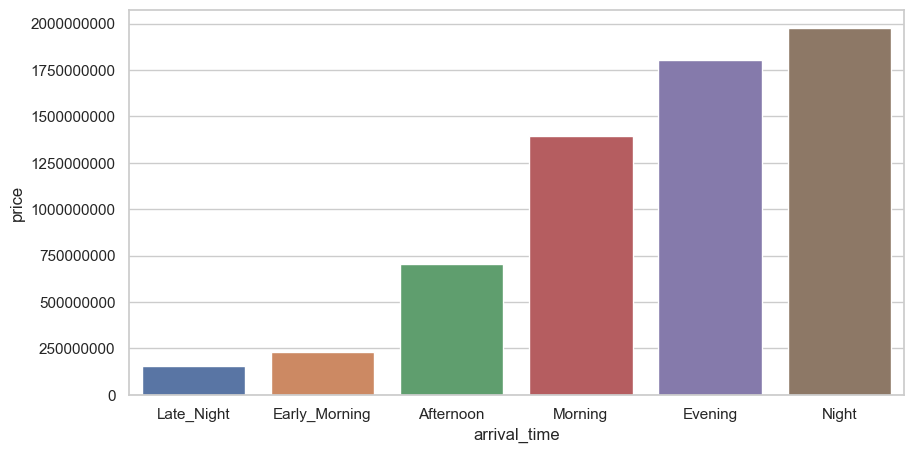

In [105]:
f = data.groupby('arrival_time')['price'].sum().reset_index().sort_values('price')

plt.figure(figsize=(10,5))
sns.barplot(data = f, x='arrival_time',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

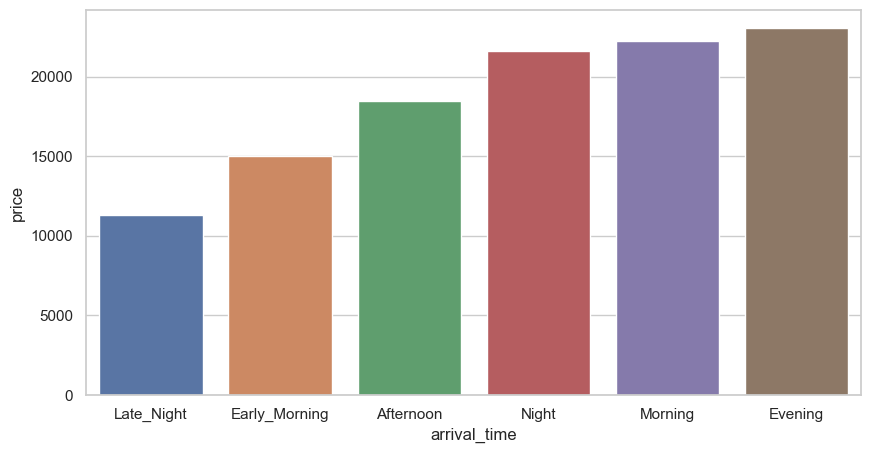

In [106]:
f = data.groupby('arrival_time')['price'].mean().reset_index().sort_values('price')

plt.figure(figsize=(10,5))
sns.barplot(data = f, x='arrival_time',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Arrival Time:

The sum of prices for flights arriving at night is the highest, indicating a potential preference for night-time arrivals.

On average, flights with evening arrival time tend to have higher prices compared to other times of the day. This may be due to factors such as convenience, demand, or specific flight schedules that cater to travelers preferring evening arrivals.

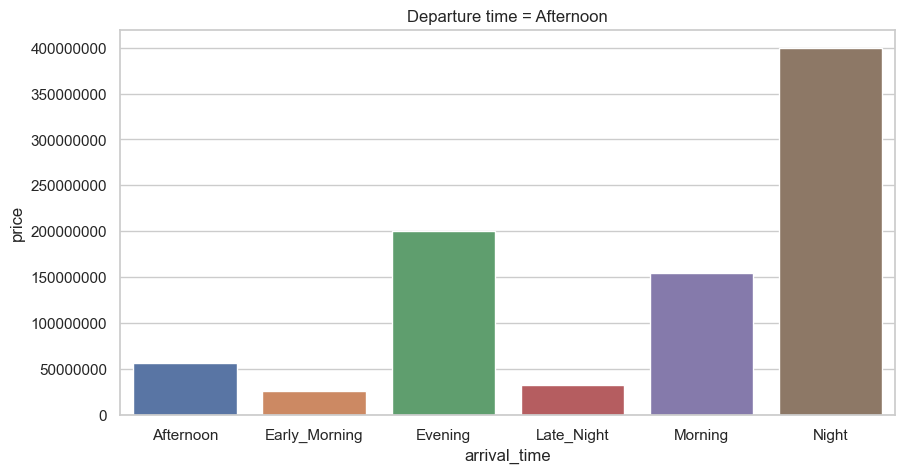

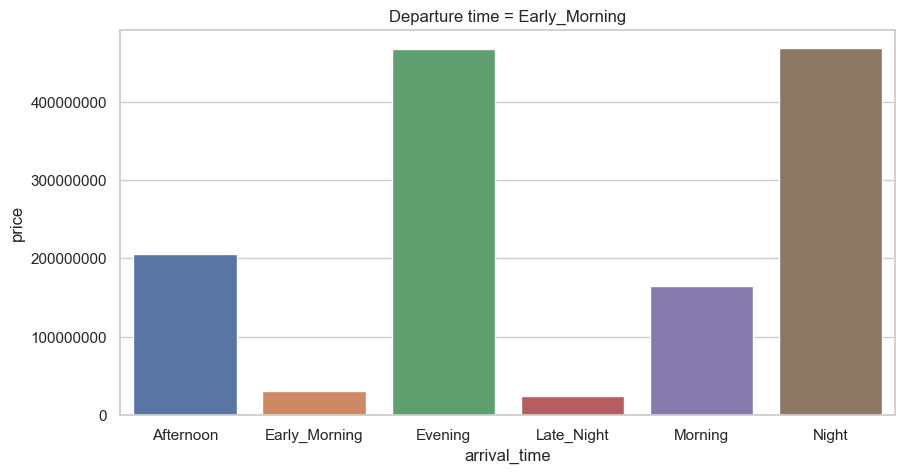

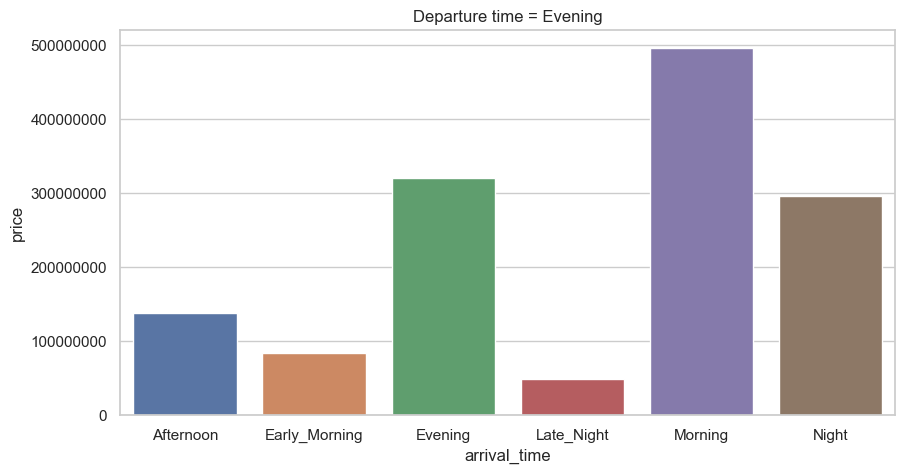

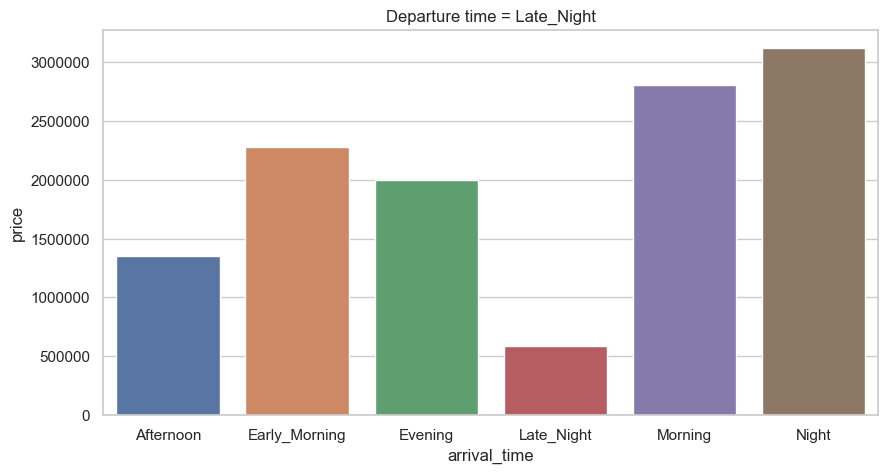

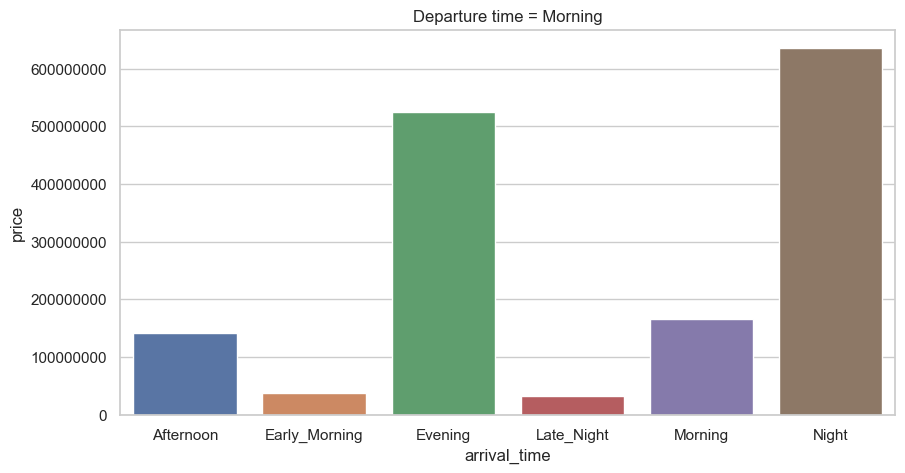

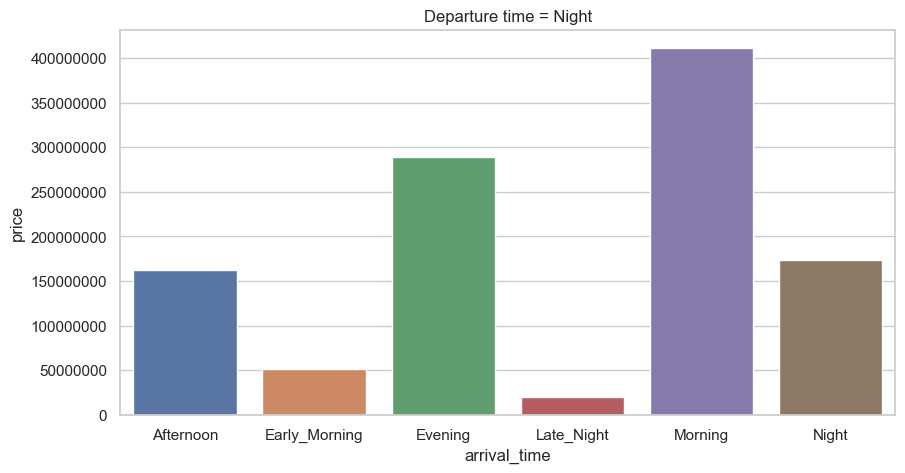

In [107]:
tm = ['Afternoon','Early_Morning' ,'Evening','Late_Night','Morning','Night']
for i in tm:
    f = data[data['departure_time'] == i].groupby('arrival_time')['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = f, x='arrival_time',y='price')
    plt.title(f'Departure time = {i}')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

### d) How the price changes with change in Source and Destination?

In [108]:
#FUNCTION FOR PLOTTING - 
def price_and(x):
    z = data.groupby(x)['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = z, x= x,y='price')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

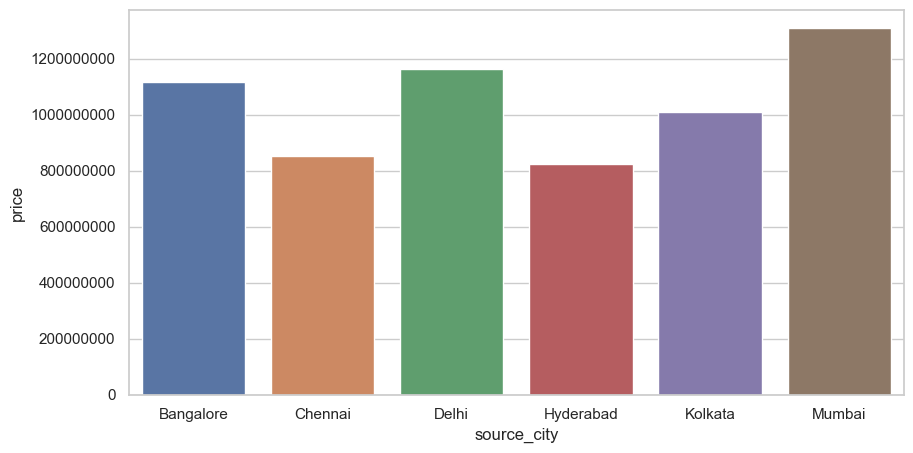

In [109]:
#data[['source_city','destination_city','price']]
price_and('source_city')

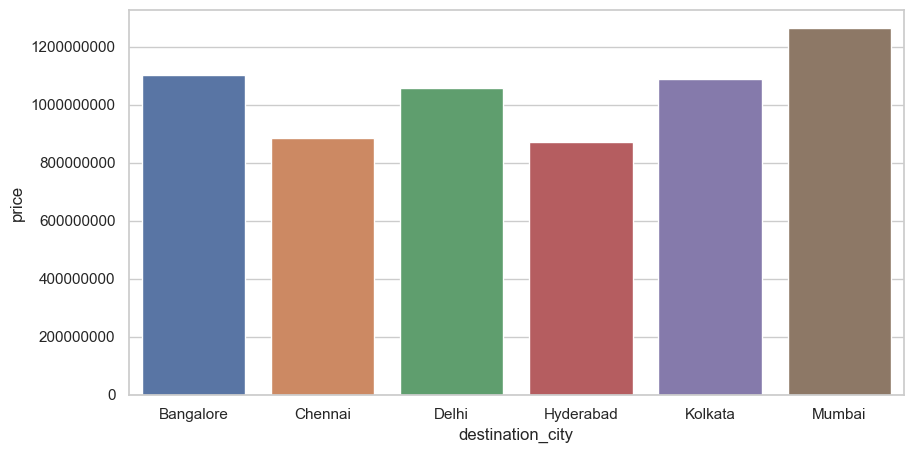

In [110]:
price_and('destination_city')

You can see that there isnt much price difference for the locations for both source city and destination city.

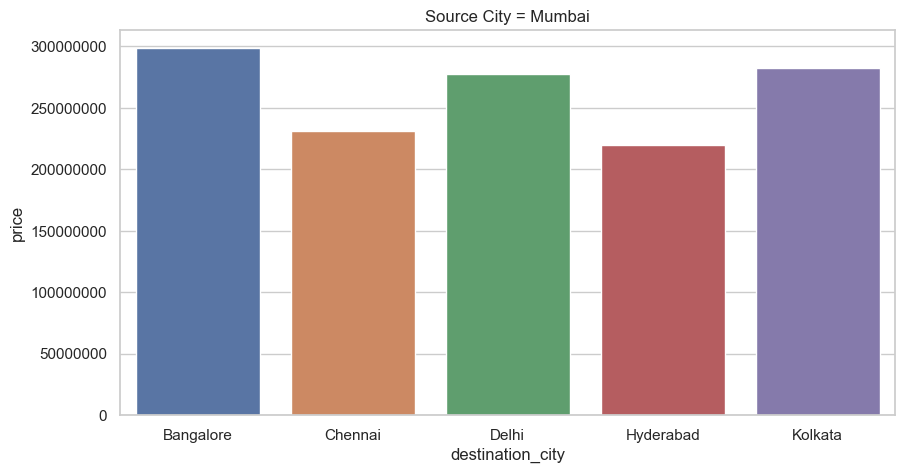

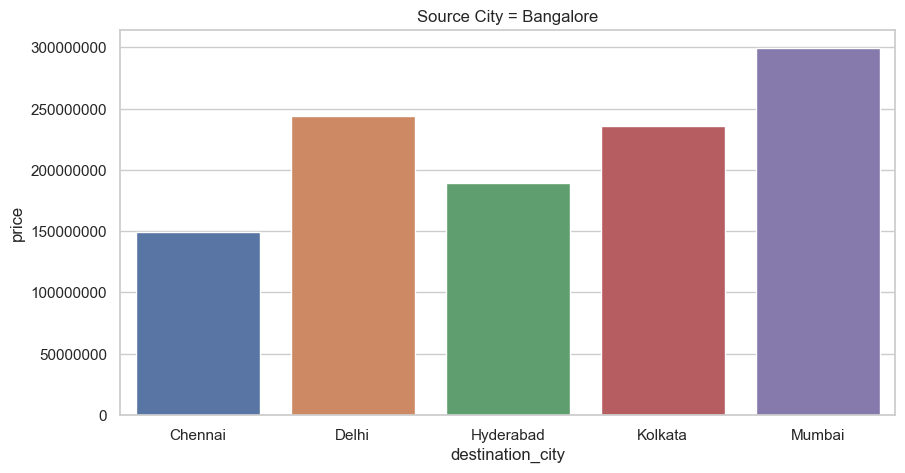

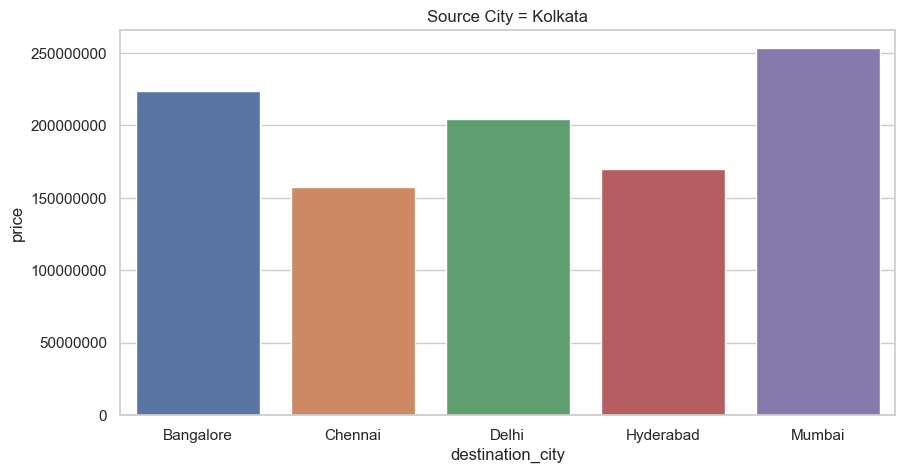

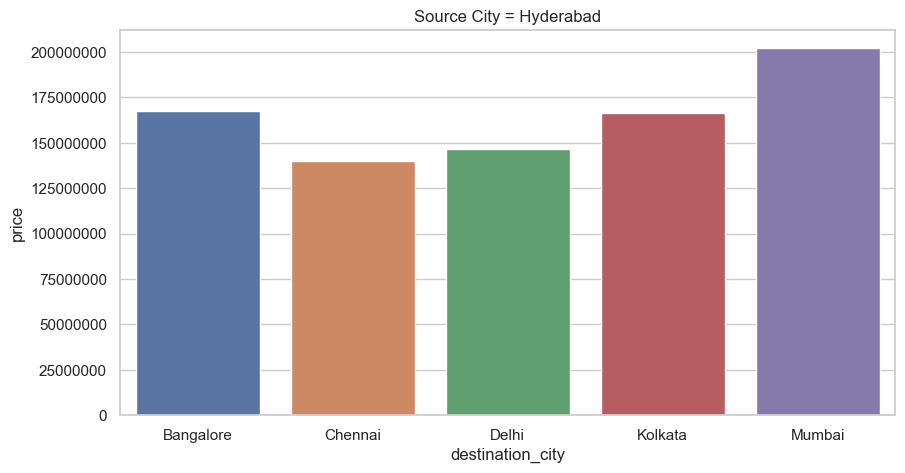

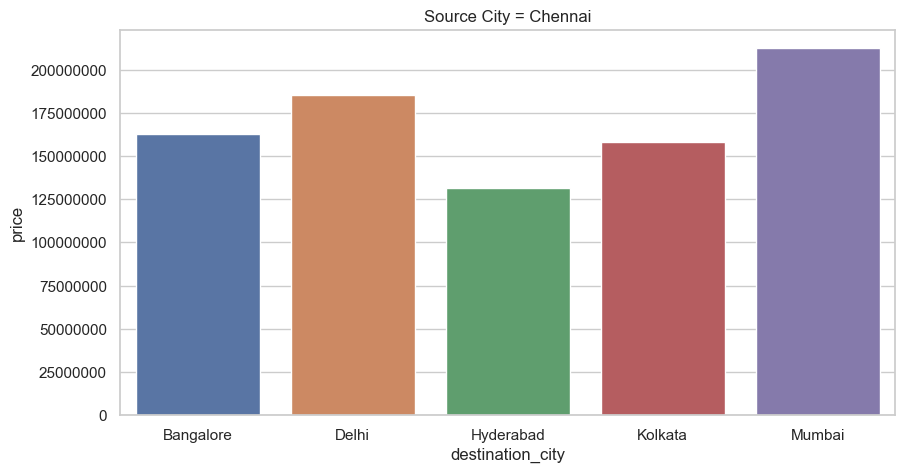

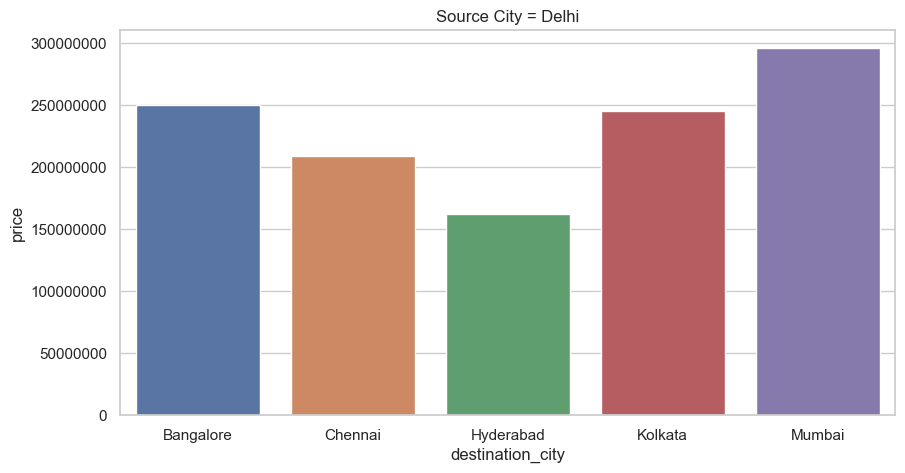

In [111]:
place = ['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi']

for i in place:
    f = data[data['source_city'] == i].groupby('destination_city')['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = f, x='destination_city',y='price')
    plt.title(f'Source City = {i}')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


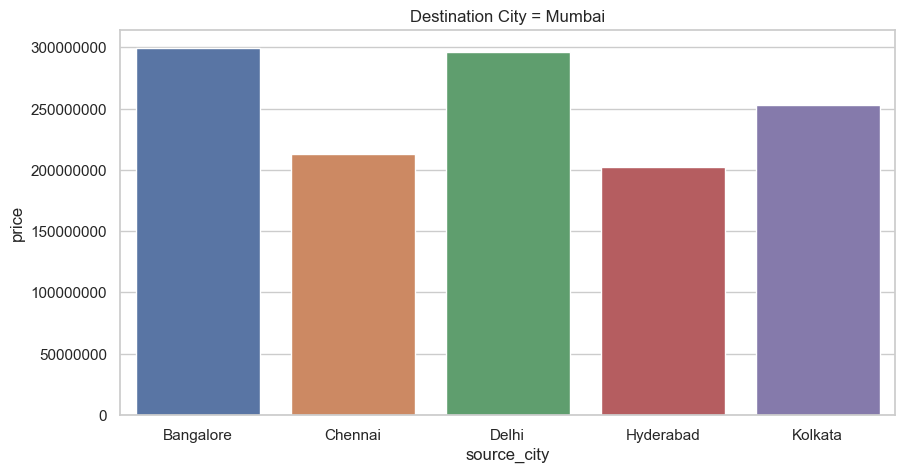

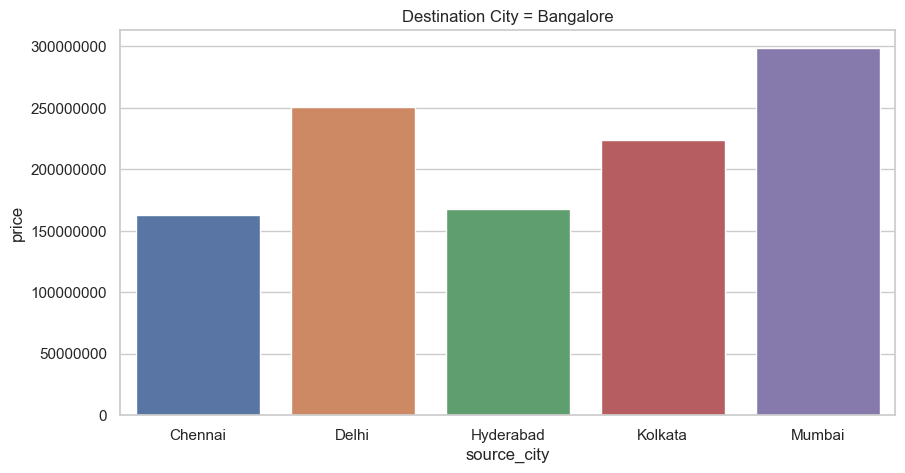

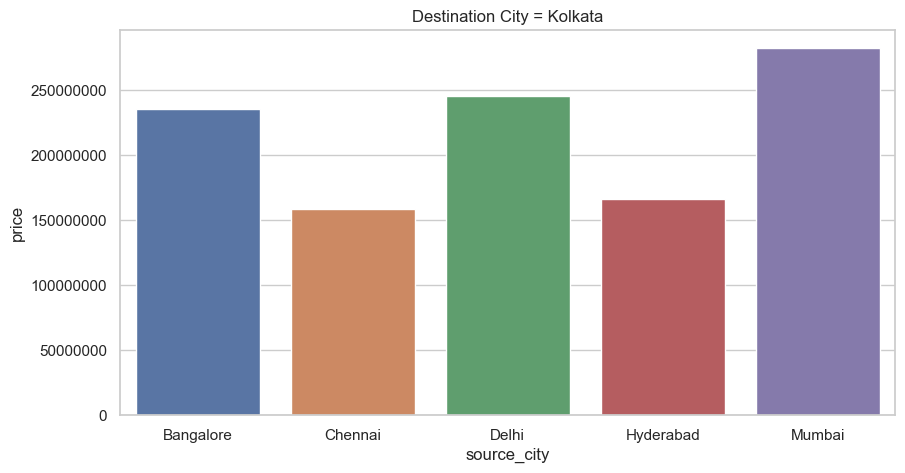

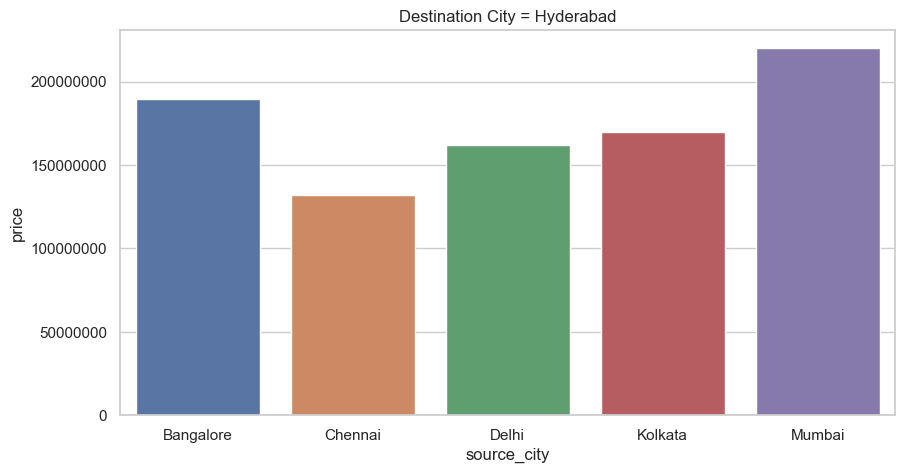

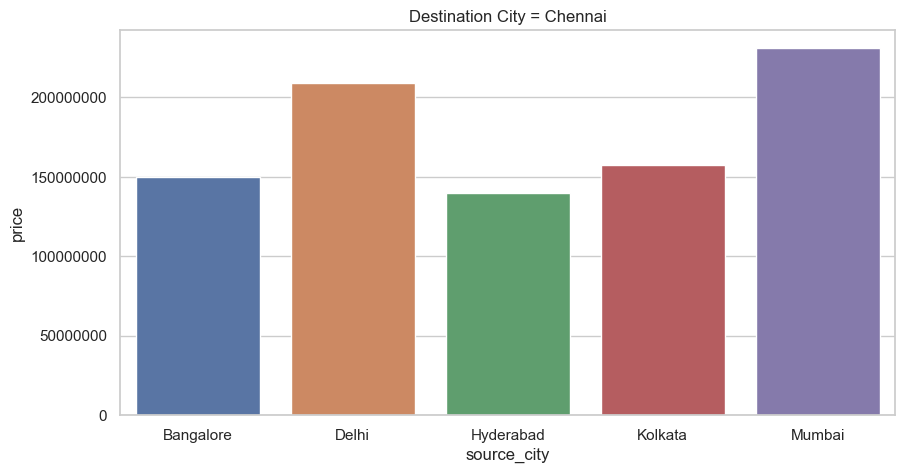

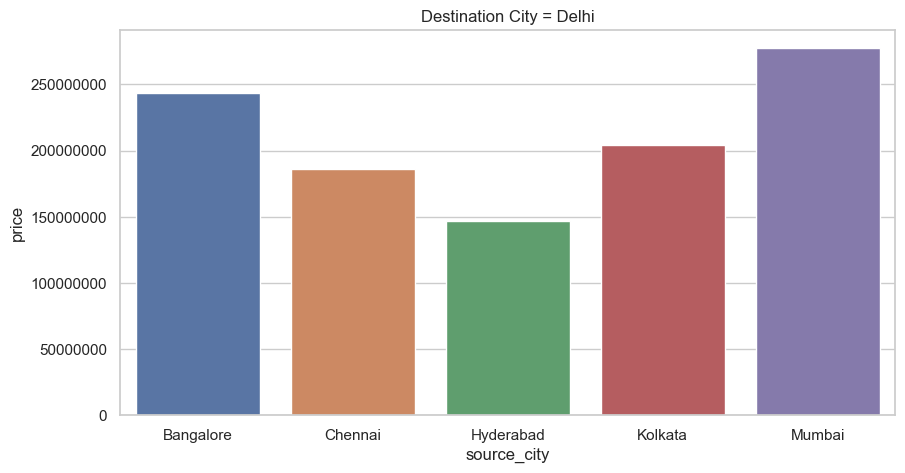

In [112]:
for i in place:
    f = data[data['destination_city'] == i].groupby('source_city')['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = f, x='source_city',y='price')
    plt.title(f'Destination City = {i}')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

You can see variety and combinations of price change according to soure and destination cities

## e) How does the ticket price vary between Economy and Business class?

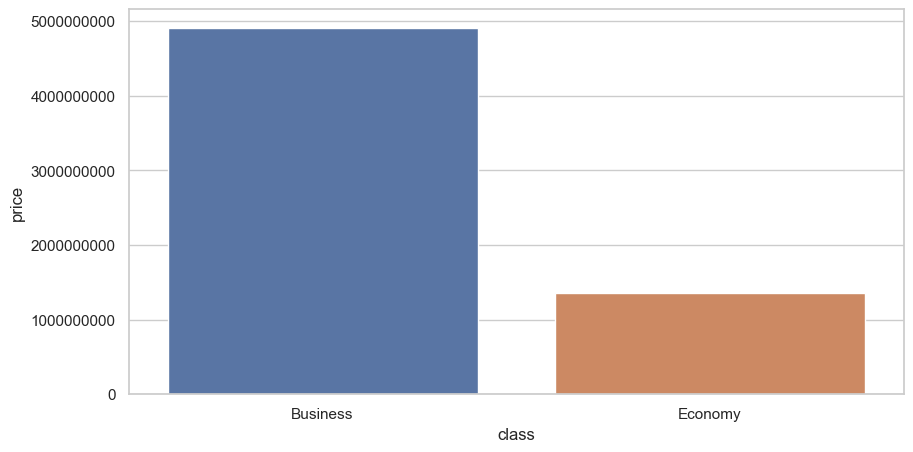

In [113]:
price_and('class')

In [114]:
#We knew that there will a price change. Above you can see the total price difference is very big.

biz_price_total = data[data['class'] == 'Business'].groupby('class')['price'].sum()
eco_price_total = data[data['class'] == 'Economy'].groupby('class')['price'].sum()

In [115]:
print("Business class total price:", biz_price_total)
print("Economy class total price:", eco_price_total)

Business class total price: class
Business    4911814564
Name: price, dtype: int64
Economy class total price: class
Economy    1358279711
Name: price, dtype: int64


In [116]:
Price_diff = 4911814564 - 1358279711
Price_diff

3553534853

In [117]:
#Lets see the difference between mean Values of both Classes
biz_price_mean = data[data['class'] == 'Business'].groupby('class')['price'].mean()
eco_price_mean = data[data['class'] == 'Economy'].groupby('class')['price'].mean()

In [118]:
print("Business class total price:", biz_price_mean)
print("*********************")
print("Economy class total price:", eco_price_mean)

Business class total price: class
Business    52540.081124
Name: price, dtype: float64
*********************
Economy class total price: class
Economy    6572.342383
Name: price, dtype: float64


In [119]:
mean_price_diff = 52540.081124 - 6572.342383
mean_price_diff

45967.738740999994

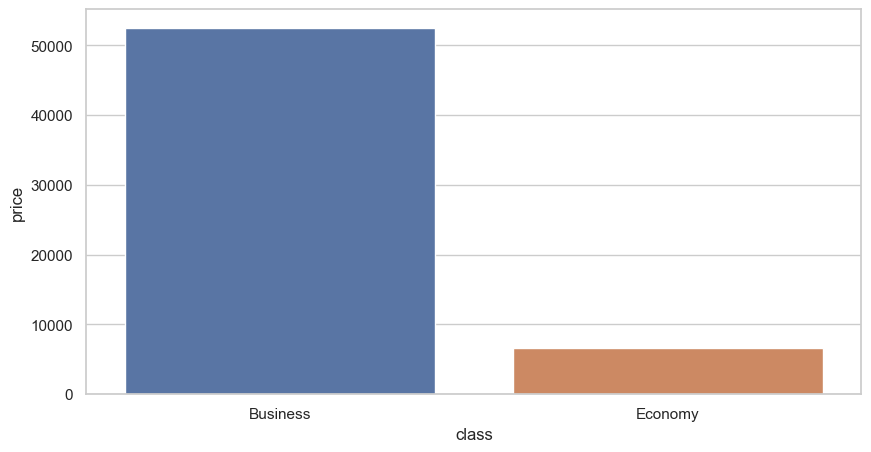

In [120]:
#PLOT FOR MEAN CLASS PRICES
y = data.groupby('class')['price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data = y, x= 'class',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# MAKING A PREDICTIVE MODEL - 

In [121]:
cat = ['airline','source_city','departure_time','arrival_time','destination_city','class']
feat = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']
target = ['price']

## 1. DATA PRE PROCESSING

### 1.1 CHECKING FOR NULL VALUES

In [122]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### No IMPUTATION REQUIRED

In [123]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [124]:
data_copy = data.copy()

### 1.2 - LABEL ENCODING 

In [125]:
import numpy as np
mapping = {'one': 1, 'zero': 0, 'two_or_more': 2}

replace_func = np.vectorize(lambda x: mapping.get(x, -1))

data['stops'] = replace_func(data['stops'])
data['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int32

In [126]:
for i in cat:
    a = data[i].value_counts()
    print(a)
    print("****************")

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
****************
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
****************
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
****************
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
****************
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
****************
Economy     206666
Business     93487
Name: class, dtype: int64
****************


In [127]:
le = LabelEncoder()

for i in cat:
    data[i] = le.fit_transform(data[i])

In [128]:
#FEATURE SELECTION
data = data.drop('flight', axis=1)

In [129]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953
2,0,2,1,0,1,5,1,2.17,1,5956
3,5,2,4,0,0,5,1,2.25,1,5955
4,5,2,4,0,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,1,2,3,0,10.08,49,69265
300149,5,1,0,1,5,3,0,10.42,49,77105
300150,5,1,1,1,5,3,0,13.83,49,79099
300151,5,1,1,1,2,3,0,10.00,49,81585


### 2. TEST TRAIN VALIDATION SPLIT

In [130]:
X = data[feat]
y = data['price']

In [131]:
# Split dataset into training and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (60/40 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

#Split at 60/20/20

In [132]:
train = X_train.copy()
train['target'] = y_train

val = X_val.copy()
val['target'] = y_val

test = X_test.copy()
test['target'] = y_test

In [133]:
train.shape, test.shape, val.shape

((180091, 10), (60031, 10), (60031, 10))

In [134]:
#ALL SCORES

def scores(y_true, y_pred):
    from sklearn.metrics import r2_score
    
    r2 = r2_score(y_true, y_pred)
    ab_r2 = abs(r2)
    
    print(f" R2 Score is {r2}")
    print (f" Abs R2 Score is {ab_r2}")


### 3. MODELS 

### 3.1 - LINEAR REGRESSION

In [135]:
target = ['target']

In [136]:
#1 LINEAR MODEL
lin_reg = LinearRegression(fit_intercept=True, normalize = False)
lin_reg.fit(train[feat], train[target])

C:\Users\khann\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [137]:
# use trained model to make predictions on training data
train['lin_pred'] = lin_reg.predict(train[feat])
scores(train[target],train['lin_pred'])

 R2 Score is 0.9063194627275285
 Abs R2 Score is 0.9063194627275285


In [138]:
# use trained model to make predictions on training data
val['lin_pred'] = lin_reg.predict(val[feat])
scores(val[target],val['lin_pred'])

 R2 Score is 0.9065943184207321
 Abs R2 Score is 0.9065943184207321


In [139]:
# use trained model to make predictions on training data
test['lin_pred'] = lin_reg.predict(test[feat])
scores(test[target],test['lin_pred'])

 R2 Score is 0.9062645483863052
 Abs R2 Score is 0.9062645483863052


### 3.2 POLYNOMIAL

In [140]:
 poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(train[feat])

# create LinearRegression object and fit on transformed training data
poly_reg = LinearRegression()
poly_reg.fit(X_poly, train[target])


LinearRegression()

In [141]:
# use trained model to make predictions on training data
train['poly_pred'] = poly_reg.predict(X_poly)
scores(train[target],train['poly_pred'])

 R2 Score is 0.9544155173934104
 Abs R2 Score is 0.9544155173934104


In [142]:
X_poly_val = poly.transform(val[feat])

# use trained model to make predictions on VAL data
val['poly_pred'] = poly_reg.predict(X_poly_val)
scores(val[target],val['poly_pred'])

 R2 Score is 0.9531169714810706
 Abs R2 Score is 0.9531169714810706


In [143]:
X_poly_test = poly.transform(test[feat])

# use trained model to make predictions on VAL data
test['poly_pred'] = poly_reg.predict(X_poly_test)
scores(test[target],test['poly_pred'])

 R2 Score is 0.9527748101257996
 Abs R2 Score is 0.9527748101257996


### 3.3 DECISION TREE

In [144]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 40, min_samples_leaf = 2, min_samples_split = 30)
dt.fit(train[feat], train[target])

DecisionTreeRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=30)

In [145]:
# use trained model to make predictions on training data
train['dt_reg'] = dt.predict(train[feat])
scores(train[target],train['dt_reg'] )

 R2 Score is 0.9879873727203664
 Abs R2 Score is 0.9879873727203664


In [146]:
# use trained model to make predictions on Val data
val['dt_reg'] = dt.predict(val[feat])
scores(val[target],val['dt_reg'])

 R2 Score is 0.9824221004015097
 Abs R2 Score is 0.9824221004015097


In [147]:
# use trained model to make predictions on Test data
test['dt_reg'] = dt.predict(test[feat])
scores(test[target],test['dt_reg'])

 R2 Score is 0.981971844021617
 Abs R2 Score is 0.981971844021617


### 3.4 RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150 ,max_depth = 30, min_samples_leaf = 5, min_samples_split = 30)
rf.fit(train[feat], train[target])

C:\Users\khann\AppData\Local\Temp\ipykernel_1980\2803494049.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train[feat], train[target])


RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=30,
                      n_estimators=150)

In [149]:
# use trained model to make predictions on training data
train['rf_reg'] = rf.predict(train[feat])
scores(train[target],train['rf_reg'] )

 R2 Score is 0.9871719609679764
 Abs R2 Score is 0.9871719609679764


In [150]:
# use trained model to make predictions on Val data
val['rf_reg'] = rf.predict(val[feat])
scores(val[target],val['rf_reg'] )

 R2 Score is 0.9840801601178686
 Abs R2 Score is 0.9840801601178686


In [151]:
# use trained model to make predictions on TEST data
test['rf_reg'] = rf.predict(test[feat])
scores(test[target],test['rf_reg'] )

 R2 Score is 0.9839689035126566
 Abs R2 Score is 0.9839689035126566


### 3.5 XGBOOST

In [152]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(n_estimators = 200 ,max_depth = 50)
xg_reg.fit(train[feat], train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=50, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [153]:
# use trained model to make predictions on training data
train['xg_reg'] = xg_reg.predict(train[feat])
scores(train[target],train['xg_reg'] )

 R2 Score is 0.9994554813306188
 Abs R2 Score is 0.9994554813306188


In [154]:
# use trained model to make predictions on Val data
val['xg_reg'] = xg_reg.predict(val[feat])
scores(val[target],val['xg_reg'] )

 R2 Score is 0.9835668225769946
 Abs R2 Score is 0.9835668225769946


In [155]:
# use trained model to make predictions on TEST data
test['xg_reg'] = xg_reg.predict(test[feat])


In [156]:
scores(test[target],test['xg_reg'] )

 R2 Score is 0.9832222390825064
 Abs R2 Score is 0.9832222390825064


### Selecting model - XGBOOST